Osnabrück University - Machine Learning (Summer Term 2024) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Lukas Niehaus

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 26, 2022**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Curse of Dimensionality (5 points)

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification?

YOUR ANSWER HERE
-> in high-dimensional spaces you have phenomena, that you don't have in low dimensional spaces
-> no really defined term
-> (usually talked about: descriptive dimensionality, = how many n)

**b)** Explain how this phenomenom could be used to one's advantage.

YOUR ANSWER HERE
-> randomly sampling data in high dimensional space is usually evenly distanced (distances between points are ~equal)
-> very sparse

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.

YOUR ANSWER HERE
-> descriptive; how many dimensions exist for each datapoint
-> intrinsic; how many dimensions are strictly necessary to model the datapoints while keeping the distance the same

**d)** The $n$-dimensional unit cube: A cube with edge length $d=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume and the length of the diagonal for $n = 1, 2, 3, 4, 5, 10, 100, 1000$. Do the same for $d=\frac{1}{2}$. Discuss the result.

In [4]:
import math
def calc_volume_and_diagonal(edge_len = 1, dim = 1):
    vol = edge_len ** dim
    diagonal = math.sqrt(edge_len**2 * dim) # need edge_len in case of 0.5

    print(f"volume: {vol} | len of diagonal: {diagonal}")


print("With edge length = 1:")
for i in [1, 2, 3, 4, 5, 10, 100, 1000]:
    calc_volume_and_diagonal(1, i)

print("----------------")
print("With edge length = 0.5:")
for i in [1, 2, 3, 4, 5, 10, 100, 1000]:
    calc_volume_and_diagonal(0.5, i)

With edge length = 1:
volume: 1 | len of diagonal: 1.0
volume: 1 | len of diagonal: 1.4142135623730951
volume: 1 | len of diagonal: 1.7320508075688772
volume: 1 | len of diagonal: 2.0
volume: 1 | len of diagonal: 2.23606797749979
volume: 1 | len of diagonal: 3.1622776601683795
volume: 1 | len of diagonal: 10.0
volume: 1 | len of diagonal: 31.622776601683793
----------------
With edge length = 0.5:
volume: 0.5 | len of diagonal: 0.5
volume: 0.25 | len of diagonal: 0.7071067811865476
volume: 0.125 | len of diagonal: 0.8660254037844386
volume: 0.0625 | len of diagonal: 1.0
volume: 0.03125 | len of diagonal: 1.118033988749895
volume: 0.0009765625 | len of diagonal: 1.5811388300841898
volume: 7.888609052210118e-31 | len of diagonal: 5.0
volume: 9.332636185032189e-302 | len of diagonal: 15.811388300841896


YOUR ANSWER HERE

**e)** The $n$-dimensional unit ball: A ball with radius $r=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume for $n = 1,2,3,5,10,100,300,400$. Use the following formula to compute the volume $V$ for a given dimension $n$ and radius $R$:

$$ V_{n}(R)\sim {\frac {1}{\sqrt {n\pi }}}\left({\frac {2\pi e}{n}}\right)^{\frac {n}{2}}R^{n}$$

Refer to https://en.wikipedia.org/wiki/Volume_of_an_n-ball for more details.

Consider a $n$-dimensional unit orange consisting of the peel and the pulp: Let the thickness of the peel be $1\%$ of the radius. Compute the volume of the peel and compare to the volume of the whole orange for the same values of $n$. State the implications of your observations.

In [6]:
import math

def orange_peel(radius = 1, dim = 1):
    orange = (1/math.sqrt(dim*math.pi)) * (2*math.pi*math.e/dim)**(dim/2) * radius**dim
    peel = orange - (1/math.sqrt(dim*math.pi)) * (2*math.pi*math.e/dim)**(dim/2) * (radius*0.99)**dim
    print(f"dimensions: {dim} | ratio peel/orange: {peel/orange}")

for i in [1,2,3,5,10,100,300,400]:
    orange_peel(dim = i)

# same as with cube in lecture

dimensions: 1 | ratio peel/orange: 0.009999999999999936
dimensions: 2 | ratio peel/orange: 0.01990000000000001
dimensions: 3 | ratio peel/orange: 0.029700999999999925
dimensions: 5 | ratio peel/orange: 0.049009950100000046
dimensions: 10 | ratio peel/orange: 0.09561792499119567
dimensions: 100 | ratio peel/orange: 0.6339676587267709
dimensions: 300 | ratio peel/orange: 0.9509591059287144
dimensions: 400 | ratio peel/orange: 0.9820494467249549


YOUR ANSWER HERE

## Assignment 2: Implement and Apply PCA (8 points)

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://jse.amstat.org/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches).

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [4]:
import numpy as np

# Load the cars dataset in cars.csv .
cars = np.loadtxt('cars.csv', delimiter = ",")

assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

Excecute the following code which will create a scatter plot matrix (it might take some time to execute). This should give you an idea about trends and correlations in the dataset.

/home/rikmeyer/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rikmeyer/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rikmeyer/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rikmeyer/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

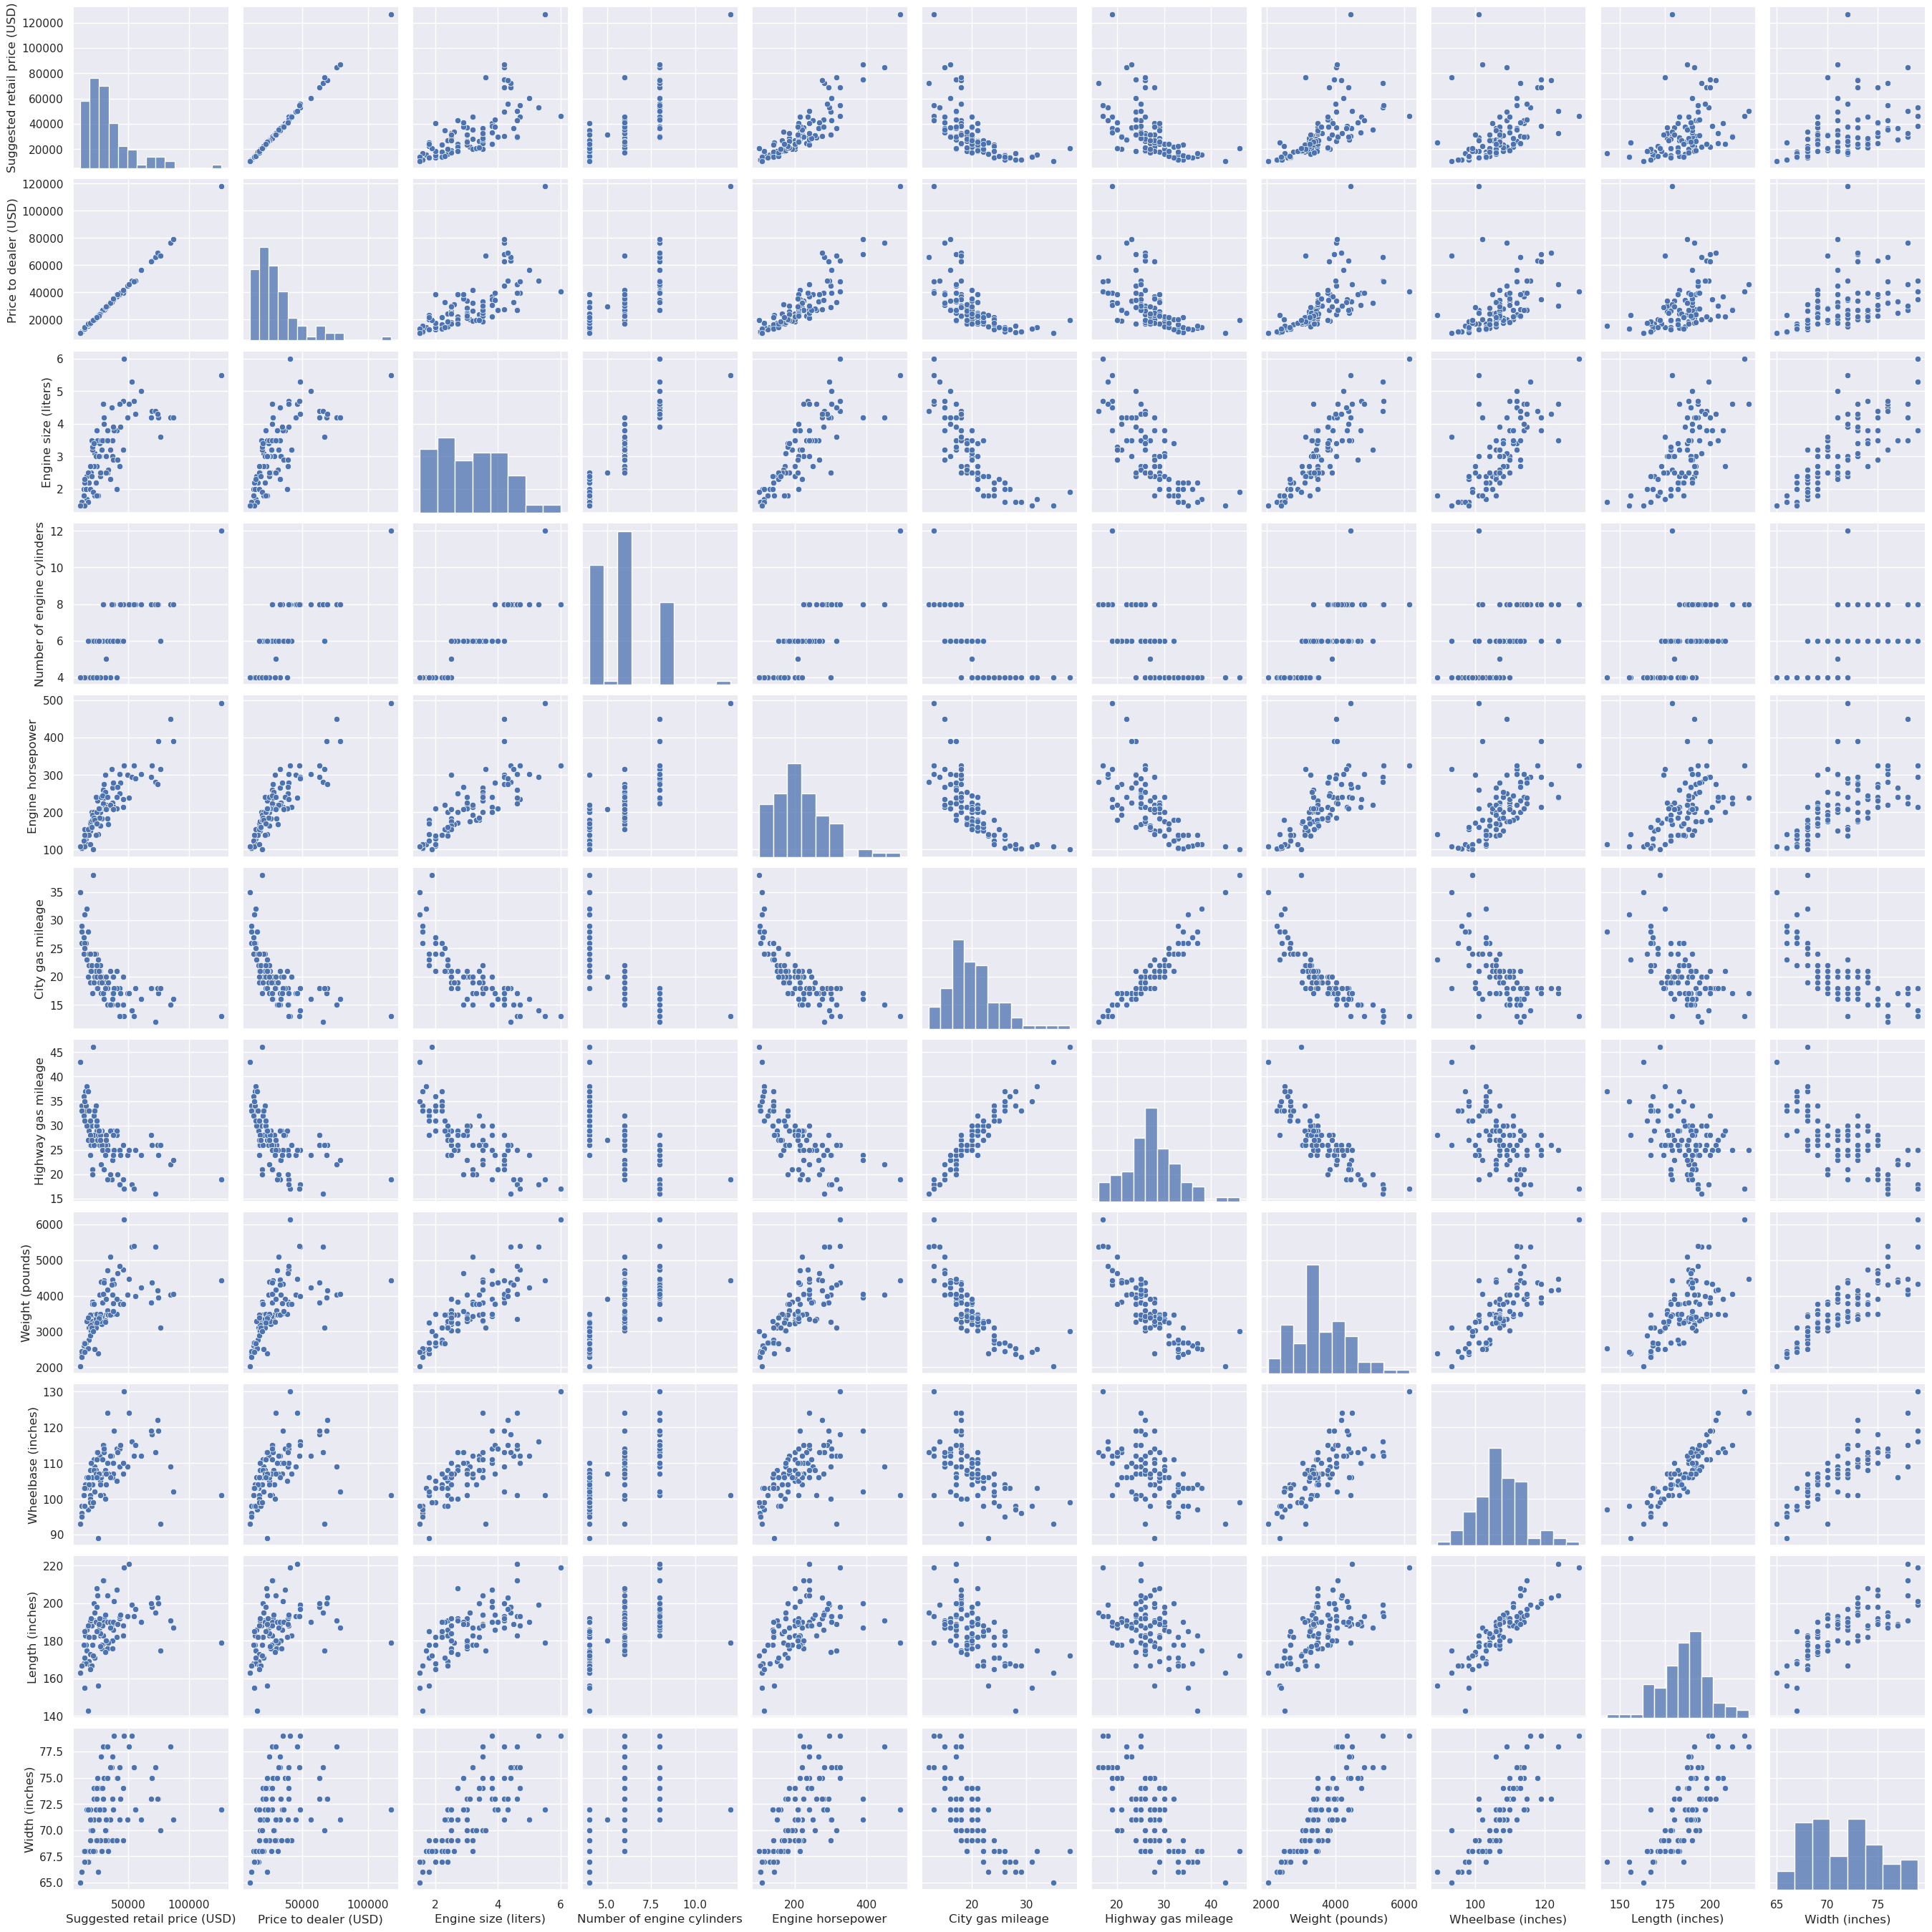

In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
cols = ['Suggested retail price (USD)', 'Price to dealer (USD)',
          'Engine size (liters)', 'Number of engine cylinders',
          'Engine horsepower', 'City gas mileage' ,
          'Highway gas mileage', 'Weight (pounds)',
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']

df = pd.DataFrame(cars, columns=cols)
sns.pairplot(df)

Looking at the scatter plot matrix above:
1. Why does the forth column/row look so different compared to the others?
2. If you would have to pick only two attributes to describe the entire dataset: Which two attributes would be the worst two pick? Why?
3. If you would have to pick only two attributes to describe the entire dataset: Which two attributes would be a better pick? Why?
4. Guess how many principle components are needed to explain 75% of the variance in the dataset if you would apply PCA to the dataset. Why?

YOUR ANSWER HERE

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the covariance matrix and afterwards the eigenvalues. When the data is normalized the covariance is calculated as

$$C = \frac{1}{n-1}((\bf{X}-\bar{x})^T(\bf{X}-\bar{x})) $$

with $X$ being an $n \times d$ matrix with $n$ samples and $d$ features, when $\bar{X}$ is the mean vector of features
$$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}x_i.$$  

The entry $c_{i,j}$ in $C$ (a $d\times d$ matrix) tells you how much feature $i$ correlates with feature $j$.


**Note**: When the features have different scales, for achieving comparable covariance values, **first and before calculating the covariance matrix**, we need to standardize $X$ respecting its features

$${\bf{X}}_{norm} = \frac{\bf{X}}{\sigma}$$

when $\sigma$ is the standard deviation vector of features.

In [20]:
# TODO: Compute the covariance matrix and store it into covar
sd_ft_vec = np.std(cars, axis=0)
x_norm = cars /sd_ft_vec
x_mean = np.mean(x_norm, axis=0)
covar = 1/ (x_norm.shape[0]-1) * np.matmul(np.transpose(x_norm - x_mean), (x_norm- x_mean))

assert covar.shape == (11, 11)

# TODO: Compute the eigenvalues and eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
eigenval, eigenvec = np.linalg.eig(covar)

assert eigenval.shape == (11,)
assert eigenvec.shape == (11, 11)
for ev in eigenvec: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

Plot the spectrum of the eigenvalues and make sure that they are sorted by their magnitude (in descending order).

**Note:** Sorting should be done respecting eigenvalues vector, but the order of eigenvectors should also be updated such that the corresponding pairs of eigenvalue-eigenvector be accessible with the same index.

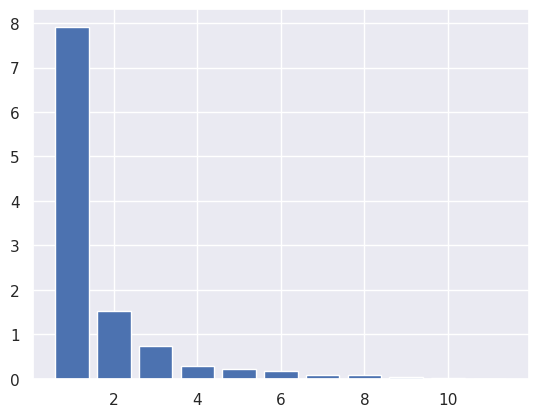

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
eigenval_idx_sorted = np.argsort(eigenval, axis = 0)
eigenvec_sorted = np.flip(eigenvec[eigenval_idx_sorted]) # flip bc should be descending
eigenval_sorted = np.flip(eigenval[eigenval_idx_sorted])

plt.bar(list(range(1, len(eigenval_sorted)+1)),eigenval_sorted)

assert not isinstance(eigenval, np.matrix)
assert not isinstance(eigenvec, np.matrix)

How many principal components should you include based on the spectrum plot?

One method to decide about the number of components is the "explained variance." The amount of data variance captured by each principal components is the magnitude of its corresponding eigenvalue. Therefore, in the explained variance method, we calculate the proportion of each the eigenvalue respective to the total sum of the eigenvalues. That gives us the percentage of data variance explained by each corresponding principal component. And the cumulative sum of these percentages shows how much more of the dataset information (variance) is presentable with taking one more component. Knowing that on one hand, and the computational cost and the difficulty of visualization of one more dimension gives a clue for the decision.

Execute the cells below and decide about an efficient number of principal components.

YOUR ANSWER HERE

In [ ]:
var_exp = [val*100/sum(eigenval) for val in eigenval]
cum_sum = np.cumsum(var_exp)

fig, ax = plt.subplots()
ind = range(1, len(eigenval)+1)
plt.bar(ind, var_exp, label='Explained Variance')
plt.step(ind, cum_sum, 'r:',
         where='mid', label='Cumulative Sum')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
ax.set_xticks(ind)
plt.legend(loc='center right');

As you can see, with the first eigenvalue/component we can describe about 70% of the variance in our dataset; taking the first two will increase it to more than 80%. For the sake of a convenient visualization we will go with the first two components, because the increase of the variation is not that much after the second component.

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the two cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the second plot? (**put your answer in the cell below of this code cell**)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,:2]


# Plot projected data
plt.title('Data Projected Onto First two Principal Components')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))
plt.scatter(proj[:,0], proj[:,1], alpha=.4)

# Plot the PC Vectors
# Project them and scale them by the standard deviation.
eigenvec_p = eigenvec.T @ eigenvec * np.sqrt(eigenval)
origin = np.mean(proj, axis=0)

plt.quiver(*origin, eigenvec_p[0,0], eigenvec_p[0,1], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, eigenvec_p[1,0], eigenvec_p[1,1], angles='xy', scale_units='xy', scale=1)


plt.text(-12,-17.5, 'PC1')
plt.text(-18,-15, 'PC2');

In [ ]:
# Set the plot
plt.figure(figsize=(10,8))

plt.title('Eigenvectors Plot')
plt.axhline(0, color='green', linestyle=':')
plt.axvline(0, color='green', linestyle=':')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))


# plot centered projected data
proj = proj - np.mean(proj, axis=0)
plt.scatter(proj[:,0], proj[:,1], alpha=.4)

# scale eigenvectors
eigenvec_s = eigenvec * np.sqrt(eigenval)

# Plot the eigenvector and add the labels
for idx, eivec in enumerate(eigenvec_s[:,:2]):
    plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
              color=plt.get_cmap('Set3')(idx), 
              width=0.03, head_width=.2, label=cols[idx])   

plt.legend()
plt.show()

YOUR ANSWER HERE

## Assignment 3: PCA (7 points)

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the covariance matrix $C$ corresponding to the $m$ largest eigenvalues. The proof consists of two steps.

**a) First step:** Consider a one dimensional subspace: Determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The covariance matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

YOUR ANSWER HERE

**b) Second step:** Now proof the statement for the general case of an $m$-dimensional projection space.

Use an inductive argument: assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to case (a), but with additional Lagrangian multipliers to enforce the orthogonality constraint. Show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally show that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.

YOUR ANSWER HERE